In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import spacy
import matplotlib.pyplot as plt

In [2]:
cdf=pd.read_csv("/Users/yonilevine/Desktop/datasets/coffeefinal.csv",index_col=0)
rdf=pd.read_csv("/Users/yonilevine/Desktop/datasets/ratingsfinal3.csv",index_col=0)

In [5]:
df = pd.merge(cdf,rdf)

In [7]:
df.altitude.replace(0,None,inplace=True)

In [8]:
df = df[df["scoref"]!=0]

In [9]:
df = df[df['nummb']+df['numw']>5]

In [10]:
df.reset_index(inplace=True)

In [22]:
len(df[df.scoref>85])

20

In [11]:
rm=df.groupby("roaster").agg({"scoref":"mean"}).sort_values("scoref")

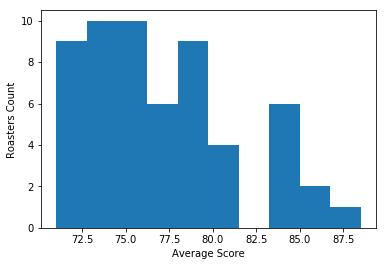

In [12]:
plt.hist(rm.scoref)
plt.xlabel("Average Score")
plt.ylabel("Roasters Count")
plt.show()

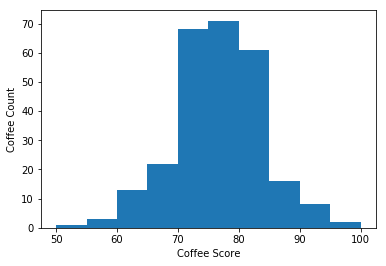

In [15]:
plt.hist(df.scoref)
plt.xlabel("Coffee Score")
plt.ylabel("Coffee Count")
plt.show()

In [24]:
bm=df.groupby("blend").agg({"scoref":"mean"}).sort_values("scoref")

In [29]:
bm

,scoref
blend,
Blend,75.337143
SingleOrigin,76.485294
Espresso,79.000000


In [34]:
rlm=df.groupby("roastlevel").agg({"scoref":"mean"}).sort_values("scoref")

In [35]:
rlm

,scoref
roastlevel,
Medium,74.898990
Very Dark,74.950000
Medium-dark,75.775510
Medium-light,76.805556
Light,78.640000


In [56]:
df.groupby("blend").agg({"price":"mean","url":"count"}).sort_values("price")

,url,price
blend,,
Blend,175,19.520000
Espresso,22,20.545455
SingleOrigin,68,21.014706


In [51]:
df.groupby(pd.cut(df["altitude"], np.arange(800,2301 ,300))).agg({"scoref":"mean","url":"count"})

,url,scoref
altitude,,
"(800, 1100]",6,72.000000
"(1100, 1400]",23,73.739130
"(1400, 1700]",30,77.433333
"(1700, 2000]",34,77.941176
"(2000, 2300]",8,85.375000


In [84]:
df=df.append(pd.get_dummies(df.blend))

In [85]:
df

,Blend,Espresso,SingleOrigin,altitude,blend,country,description,index,nummb,numw,price,process,roaster,roastlevel,scoref,scorembf,scorew,text,title,url
0,NaN,NaN,NaN,1650.0,SingleOrigin,Kenya,The Kenya Ndaro-ini Peaberry was caref...,3.0,0.0,6.0,23.0,fully ...,AKA Coffee,Medium-light,96.0,0.0,96.0,There's so...,Kenya Ndaro-ini Peaberry,https://one.mistobox.com/subscriptions/index/b...
1,NaN,NaN,NaN,1580.0,SingleOrigin,Colombia,The Colombia El Zorro Rojo was careful...,5.0,5.0,2.0,23.0,NaN,Passion House Coffee Roasters,Light,100.0,100.0,100.0,This is a ...,Colombia El Zorro Rojo,https://one.mistobox.com/subscriptions/index/b...
2,NaN,NaN,NaN,1950.0,SingleOrigin,Ethiopia,This is the Ethiopia Buku Natural brou...,12.0,39.0,25.0,23.0,full n...,Onyx Coffee Lab,Light,93.0,94.0,93.0,Wonderful ...,Ethiopia Buku Natural,https://one.mistobox.com/subscriptions/index/b...
3,NaN,NaN,NaN,2100.0,SingleOrigin,Ethiopia,""" The Ethiopia Koke was carefully roast...",13.0,48.0,26.0,20.0,full n...,Augies Coffee Roasters,Medium-light,93.0,94.0,93.0,Liked that...,Ethiopia Koke,https://one.mistobox.com/subscriptions/index/b...
4,NaN,NaN,NaN,1150.0,SingleOrigin,Mexico,The Mexico Maya Vinic was carefully ro...,15.0,7.0,1.0,20.0,fully ...,Higher Grounds Coffee,Medium-light,83.0,83.0,83.0,NaN,Mexico Maya Vinic,https://one.mistobox.com/subscriptions/index/b...
5,NaN,NaN,NaN,2050.0,SingleOrigin,Ethiopia,This is the Ethiopia Bishan Fugu Organ...,17.0,23.0,9.0,23.0,full n...,Noble Coffee Roasting,Light,91.0,91.0,92.0,Amazing Co...,Ethiopia Bishan Fugu Organic,https://one.mistobox.com/subscriptions/index/b...
6,NaN,NaN,NaN,NaN,Blend,SouthAmerica Indonesia,The Organic French Roast was blended a...,19.0,20.0,7.0,20.0,NaN,Caffe Vita Coffee Roasting Co,Very Dark,76.0,76.0,76.0,Tasty! Cou...,Organic French Roast,https://one.mistobox.com/subscriptions/index/b...
7,NaN,NaN,NaN,2175.0,SingleOrigin,Ethiopia,The Organic Ethiopia Charbanta Natural...,20.0,18.0,5.0,23.0,full n...,Kickapoo Coffee Roasters,Light,92.0,93.0,92.0,This coffe...,Organic Ethiopia Charbanta Natural Process,https://one.mistobox.com/subscriptions/index/b...
8,NaN,NaN,NaN,NaN,Espresso,SouthAmerica Indonesia Africa,""" This is the Caffe Del Sol brought to ...",26.0,54.0,26.0,20.0,NaN,Caffe Vita Coffee Roasting Co,Medium,83.0,83.0,86.0,When fresh...,Caffe Del Sol,https://one.mistobox.com/subscriptions/index/b...
9,NaN,NaN,NaN,1900.0,SingleOrigin,Ethiopia,The Ethiopia Burtukaana was carefully ...,27.0,0.0,30.0,23.0,full n...,Tandem Coffee Roasters,Light,88.0,0.0,88.0,Sweetness ...,Ethiopia Burtukaana,https://one.mistobox.com/subscriptions/index/b...


In [78]:
rld=pd.DataFrame(pd.get_dummies(df.roastlevel))

In [82]:
df.append(bd)

,Blend,Espresso,SingleOrigin,altitude,blend,country,description,index,nummb,numw,price,process,roaster,roastlevel,scoref,scorembf,scorew,text,title,url
0,NaN,NaN,NaN,1650.0,SingleOrigin,Kenya,The Kenya Ndaro-ini Peaberry was caref...,3.0,0.0,6.0,23.0,fully ...,AKA Coffee,Medium-light,96.0,0.0,96.0,There's so...,Kenya Ndaro-ini Peaberry,https://one.mistobox.com/subscriptions/index/b...
1,NaN,NaN,NaN,1580.0,SingleOrigin,Colombia,The Colombia El Zorro Rojo was careful...,5.0,5.0,2.0,23.0,NaN,Passion House Coffee Roasters,Light,100.0,100.0,100.0,This is a ...,Colombia El Zorro Rojo,https://one.mistobox.com/subscriptions/index/b...
2,NaN,NaN,NaN,1950.0,SingleOrigin,Ethiopia,This is the Ethiopia Buku Natural brou...,12.0,39.0,25.0,23.0,full n...,Onyx Coffee Lab,Light,93.0,94.0,93.0,Wonderful ...,Ethiopia Buku Natural,https://one.mistobox.com/subscriptions/index/b...
3,NaN,NaN,NaN,2100.0,SingleOrigin,Ethiopia,""" The Ethiopia Koke was carefully roast...",13.0,48.0,26.0,20.0,full n...,Augies Coffee Roasters,Medium-light,93.0,94.0,93.0,Liked that...,Ethiopia Koke,https://one.mistobox.com/subscriptions/index/b...
4,NaN,NaN,NaN,1150.0,SingleOrigin,Mexico,The Mexico Maya Vinic was carefully ro...,15.0,7.0,1.0,20.0,fully ...,Higher Grounds Coffee,Medium-light,83.0,83.0,83.0,NaN,Mexico Maya Vinic,https://one.mistobox.com/subscriptions/index/b...
5,NaN,NaN,NaN,2050.0,SingleOrigin,Ethiopia,This is the Ethiopia Bishan Fugu Organ...,17.0,23.0,9.0,23.0,full n...,Noble Coffee Roasting,Light,91.0,91.0,92.0,Amazing Co...,Ethiopia Bishan Fugu Organic,https://one.mistobox.com/subscriptions/index/b...
6,NaN,NaN,NaN,NaN,Blend,SouthAmerica Indonesia,The Organic French Roast was blended a...,19.0,20.0,7.0,20.0,NaN,Caffe Vita Coffee Roasting Co,Very Dark,76.0,76.0,76.0,Tasty! Cou...,Organic French Roast,https://one.mistobox.com/subscriptions/index/b...
7,NaN,NaN,NaN,2175.0,SingleOrigin,Ethiopia,The Organic Ethiopia Charbanta Natural...,20.0,18.0,5.0,23.0,full n...,Kickapoo Coffee Roasters,Light,92.0,93.0,92.0,This coffe...,Organic Ethiopia Charbanta Natural Process,https://one.mistobox.com/subscriptions/index/b...
8,NaN,NaN,NaN,NaN,Espresso,SouthAmerica Indonesia Africa,""" This is the Caffe Del Sol brought to ...",26.0,54.0,26.0,20.0,NaN,Caffe Vita Coffee Roasting Co,Medium,83.0,83.0,86.0,When fresh...,Caffe Del Sol,https://one.mistobox.com/subscriptions/index/b...
9,NaN,NaN,NaN,1900.0,SingleOrigin,Ethiopia,The Ethiopia Burtukaana was carefully ...,27.0,0.0,30.0,23.0,full n...,Tandem Coffee Roasters,Light,88.0,0.0,88.0,Sweetness ...,Ethiopia Burtukaana,https://one.mistobox.com/subscriptions/index/b...
